In [8]:
import sys
import os
import cv2
import warnings
import numpy as np
import random
import torch
import re

from PanoFormer.PanoFormer.PanoFormerDepthEstimator import PanoFormerDepthEstimator

warnings.filterwarnings('ignore')

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Đảm bảo các thao tác CUDA là xác định
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
DATASET_PATH = 'G:\My Drive\public_data'

In [13]:
def list_directories(path):
    matching_directories = {}

    for root, dirs, files in os.walk(path):
        pattern = re.compile(r'^\d+_colors\.png$')
        matching_files = [file for file in files if pattern.match(file)]


        if matching_files:
            file_paths = []
            for file in matching_files:
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
            matching_directories[root] = file_paths

    return matching_directories

In [14]:
matching_dirs = list_directories(DATASET_PATH)

In [17]:
import json

with open("matching_dirs.json", "w") as f:
    json.dump(matching_dirs, f, indent=4)

Using Device: cuda:0
Loading weights from PanoFormer/PanoFormer/tmp/panodepth/models/weights_pretrain\model.pth
Weights loaded successfully
{'pred_depth': tensor([[[[0.9673, 0.9483, 0.9475,  ..., 0.9471, 0.9465, 0.9930],
          [1.2291, 1.1955, 1.2010,  ..., 1.1940, 1.1935, 1.2305],
          [1.1594, 1.1249, 1.1327,  ..., 1.1225, 1.1225, 1.1406],
          ...,
          [1.8105, 1.8651, 1.8594,  ..., 1.8753, 1.8809, 1.8244],
          [1.8280, 1.8977, 1.8902,  ..., 1.9035, 1.9108, 1.8392],
          [1.3529, 1.4049, 1.3988,  ..., 1.4053, 1.4148, 1.3782]]]],
       device='cuda:0')}


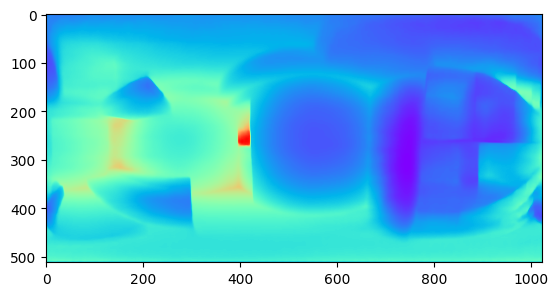

(512, 1024) <class 'numpy.ndarray'>
512 1024
3.4404764 0.6564717
{'pred_depth': tensor([[[[0.9539, 0.9240, 0.9143,  ..., 0.8978, 0.9028, 0.9463],
          [1.1965, 1.1503, 1.1506,  ..., 1.1379, 1.1433, 1.1736],
          [1.1160, 1.0729, 1.0817,  ..., 1.0679, 1.0681, 1.0794],
          ...,
          [1.7894, 1.8375, 1.8285,  ..., 1.8625, 1.8656, 1.8081],
          [1.8257, 1.8898, 1.8825,  ..., 1.9131, 1.9166, 1.8381],
          [1.3477, 1.3909, 1.3863,  ..., 1.4088, 1.4131, 1.3732]]]],
       device='cuda:0')}


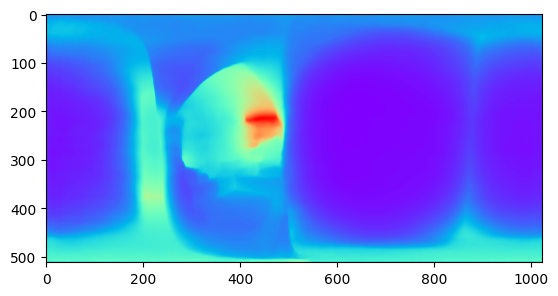

(512, 1024) <class 'numpy.ndarray'>
512 1024
3.7808616 0.39689434
{'pred_depth': tensor([[[[0.9977, 0.9813, 0.9814,  ..., 0.9701, 0.9702, 1.0123],
          [1.2774, 1.2457, 1.2498,  ..., 1.2433, 1.2415, 1.2702],
          [1.2174, 1.1854, 1.1897,  ..., 1.1872, 1.1837, 1.1949],
          ...,
          [1.7831, 1.8218, 1.8151,  ..., 1.8191, 1.8260, 1.7768],
          [1.8046, 1.8523, 1.8459,  ..., 1.8530, 1.8586, 1.7863],
          [1.3368, 1.3706, 1.3651,  ..., 1.3734, 1.3791, 1.3374]]]],
       device='cuda:0')}


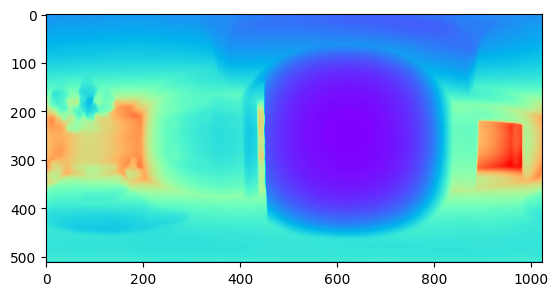

(512, 1024) <class 'numpy.ndarray'>
512 1024
3.9054492 0.5166643
{'pred_depth': tensor([[[[1.0108, 1.0124, 1.0085,  ..., 1.0102, 1.0093, 1.0395],
          [1.2809, 1.2701, 1.2702,  ..., 1.2676, 1.2679, 1.2952],
          [1.2224, 1.2129, 1.2164,  ..., 1.2132, 1.2152, 1.2263],
          ...,
          [1.7708, 1.8133, 1.8050,  ..., 1.8199, 1.8245, 1.7751],
          [1.7973, 1.8461, 1.8356,  ..., 1.8534, 1.8555, 1.7841],
          [1.3354, 1.3689, 1.3599,  ..., 1.3719, 1.3763, 1.3367]]]],
       device='cuda:0')}


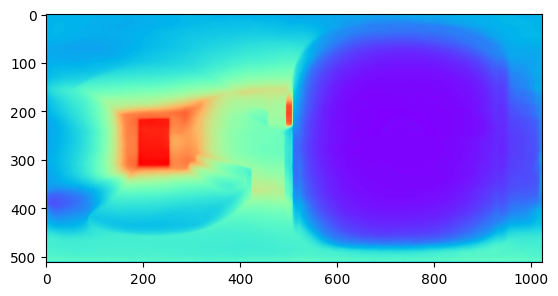

(512, 1024) <class 'numpy.ndarray'>
512 1024
3.679626 0.40693134
{'pred_depth': tensor([[[[1.1711, 1.2000, 1.2018,  ..., 1.1888, 1.1976, 1.1974],
          [1.5113, 1.5271, 1.5326,  ..., 1.5047, 1.5203, 1.5115],
          [1.4690, 1.4806, 1.4845,  ..., 1.4588, 1.4756, 1.4612],
          ...,
          [1.8807, 1.9337, 1.9238,  ..., 1.9388, 1.9456, 1.8685],
          [1.9057, 1.9689, 1.9581,  ..., 1.9719, 1.9778, 1.8797],
          [1.4227, 1.4735, 1.4638,  ..., 1.4747, 1.4824, 1.4201]]]],
       device='cuda:0')}


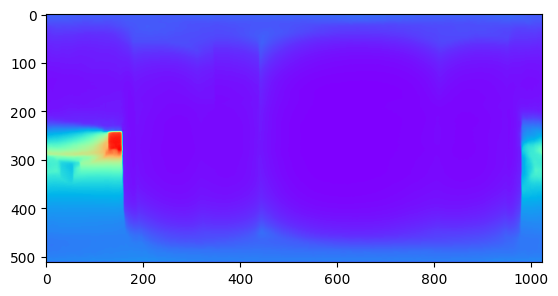

(512, 1024) <class 'numpy.ndarray'>
512 1024
8.76278 0.43392166
{'pred_depth': tensor([[[[1.2299, 1.2827, 1.2858,  ..., 1.3109, 1.2993, 1.2701],
          [1.5884, 1.6318, 1.6431,  ..., 1.6488, 1.6413, 1.6028],
          [1.5626, 1.6012, 1.6164,  ..., 1.6094, 1.6043, 1.5631],
          ...,
          [1.8915, 1.9528, 1.9487,  ..., 1.9889, 1.9956, 1.8976],
          [1.9451, 2.0040, 2.0062,  ..., 2.0518, 2.0588, 1.9439],
          [1.4663, 1.5060, 1.5033,  ..., 1.5393, 1.5434, 1.4713]]]],
       device='cuda:0')}


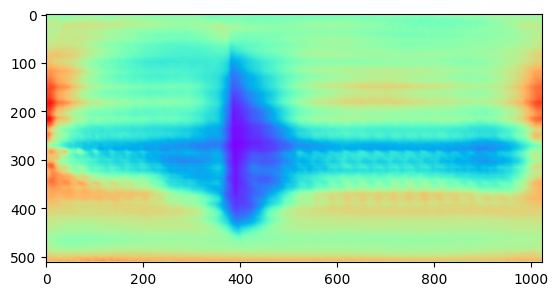

(512, 1024) <class 'numpy.ndarray'>
512 1024
2.4518564 0.5886161


In [19]:
panoformer = PanoFormerDepthEstimator(weights_path='PanoFormer/PanoFormer/tmp/panodepth/models/weights_pretrain')

i = 0
for dir, image_paths in matching_dirs.items():
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        depth_map = panoformer.predict_depth(image)
        pcd = panoformer.to_point_cloud(
            depth_map=depth_map,
            rgb_image=image,
            filter_outlier=False,
        )
        panoformer.visualize_point_cloud(pcd)
    i += 1
    if i == 3: break

Using Device: cuda:0
Loading weights from PanoFormer/PanoFormer/tmp_s2d3d/panodepth/models/weights\model.pth
Weights loaded successfully
{'pred_depth': tensor([[[[1.1867, 1.2763, 1.2724,  ..., 1.2422, 1.2505, 1.2482],
          [1.3839, 1.4520, 1.4576,  ..., 1.4118, 1.4281, 1.3699],
          [1.2986, 1.3378, 1.3482,  ..., 1.2958, 1.3202, 1.2890],
          ...,
          [1.3267, 1.4277, 1.4155,  ..., 1.4321, 1.4348, 1.3929],
          [1.5019, 1.6314, 1.6198,  ..., 1.6313, 1.6392, 1.5603],
          [1.3193, 1.4253, 1.4178,  ..., 1.4282, 1.4336, 1.3430]]]],
       device='cuda:0')}


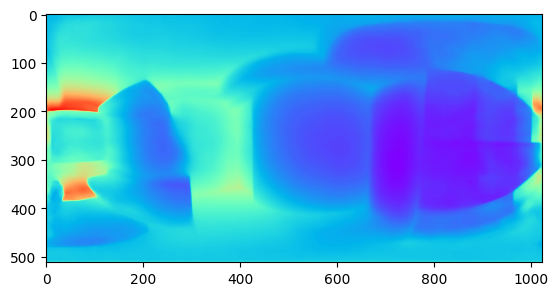

(512, 1024) <class 'numpy.ndarray'>
512 1024
3.3734791 0.5057195
{'pred_depth': tensor([[[[1.0892, 1.1416, 1.1378,  ..., 1.0941, 1.1082, 1.1455],
          [1.2650, 1.2930, 1.2962,  ..., 1.2526, 1.2684, 1.2498],
          [1.1829, 1.1876, 1.1964,  ..., 1.1569, 1.1750, 1.1818],
          ...,
          [1.2560, 1.3095, 1.2894,  ..., 1.3034, 1.3110, 1.2892],
          [1.4295, 1.5145, 1.4958,  ..., 1.4994, 1.5015, 1.4428],
          [1.2837, 1.3461, 1.3305,  ..., 1.3311, 1.3329, 1.2536]]]],
       device='cuda:0')}


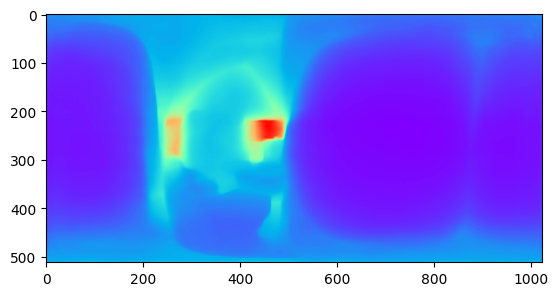

(512, 1024) <class 'numpy.ndarray'>
512 1024
4.6447563 0.2767345


KeyboardInterrupt: 

In [20]:
panoformer = PanoFormerDepthEstimator(weights_path='PanoFormer/PanoFormer/tmp_s2d3d/panodepth/models/weights')

i = 0
for dir, image_paths in matching_dirs.items():
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        depth_map = panoformer.predict_depth(image)
        pcd = panoformer.to_point_cloud(
            depth_map=depth_map,
            rgb_image=image,
            filter_outlier=False,
        )
        panoformer.visualize_point_cloud(pcd)
    i += 1
    if i == 3: break